# Задание 1

In [1]:
#1) Как критики относятся к спортивным играм?
#2) Критикам нравятся больше игры на PC или на PS4?
#3) Критикам больше нравятся стрелялки или стратегии?
#Для каждого вопроса:
#    сформулируйте нулевую и альтернативную гипотезы;
#    выберите пороговый уровень статистической значимости;
#    опишите полученные результаты статистического теста.


import pandas as pd
import seaborn as sns
from scipy import stats as st

df = pd.read_csv('D:/DS_data_sets/vgsales.csv')

In [2]:
#увеличивает область ноутбука
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3091,Radiata Stories,PS2,2005.0,Role-Playing,Square Enix,0.18,0.14,0.29,0.05,0.65,74.0,36.0,9,54.0,Tri-Ace,T
7714,Big Mutha Truckers,XB,2002.0,Racing,Empire Interactive,0.15,0.04,0.00,0.01,0.19,59.0,12.0,4.3,9.0,Eutechnyx,T
673,Donkey Kong Land II,GB,1996.0,Platform,Nintendo,1.39,0.48,0.40,0.08,2.35,NaN,NaN,NaN,NaN,NaN,NaN
3535,The Conduit,Wii,2009.0,Shooter,Sega,0.28,0.23,0.00,0.06,0.57,69.0,79.0,8.2,258.0,High Voltage Software,T
7304,Transformers: Dark of the Moon,3DS,2011.0,Action,Activision,0.16,0.04,0.00,0.02,0.21,NaN,NaN,NaN,NaN,NaN,NaN


### 1) Как критики относятся к спортивным играм?

Принимаем, что относяться положительно при оценке не ниже 70

H0: Средняя оценка критиков <= 70

H1: Средня оценка кртиков >70

Пороговый уровень стат. значимости: 0,05

#### Вывод:
Отвергаем улевую гипотезу, критикам нравятся спортивные игры

In [5]:
#без dropna не считалось
sport_critic = df[df['Genre'] == 'Sports']['Critic_Score'].dropna()
sport_critic.describe()

count    1194.000000
mean       71.968174
std        13.878433
min        19.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        98.000000
Name: Critic_Score, dtype: float64

<AxesSubplot:>

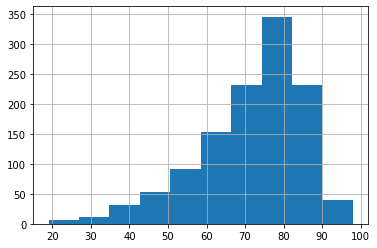

In [6]:
sport_critic.hist()
#распредеение не носит характер нормального

In [7]:
alpha = 0.05
threshold = 70

res = st.ttest_1samp(sport_critic, threshold, alternative = 'greater')

print('среднее по выборке:',sport_critic.mean())
print(res)

print('Вывод: ', end = '')
if res.pvalue < alpha:
    print('отвергаем нулевую гипотезу, среднее больше 70, критики относяться положительно')
else:
    print('не отвергаем нулевую гипотезу, критики относятся отрицательно')

среднее по выборке: 71.96817420435511
Ttest_1sampResult(statistic=4.900329475499578, pvalue=5.442744598708131e-07)
Вывод: отвергаем нулевую гипотезу, среднее больше 70, критики относяться положительно


### 2) Критикам нравятся больше игры на PC или на PS4?
Выборки независимы, подчиняются нормальному распределению (хочется верить)

Использовать Т-критерий Стюдента для несвязанных выборок

H0: Средняя оценка PC >= средней оценки PS4

H1: Средняя оценка PC < средней оценки PS4

Пороговый уровень стат. значимости: 0,05

#### Вывод:
Критикам больше нравяться PC


In [8]:
alpha = 0.05
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Critic_Score    75.928671
dtype: float64

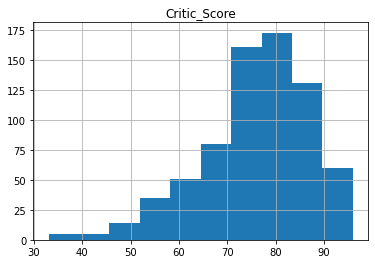

In [9]:
critic_pc = pd.DataFrame(df[df['Platform'] == 'PC']['Critic_Score'].dropna())
critic_pc.hist()
critic_pc.mean()

Critic_Score    72.09127
dtype: float64

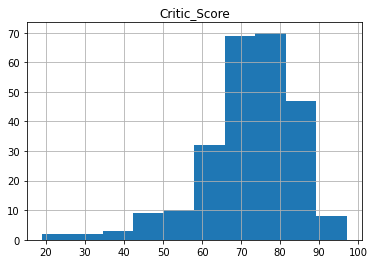

In [10]:
critic_ps4 = pd.DataFrame(df[df['Platform'] == 'PS4']['Critic_Score'].dropna())
critic_ps4.hist()
critic_ps4.mean()

In [11]:
res = st.ttest_ind(critic_pc, critic_ps4, equal_var = False, alternative = 'less')
print(res)

if res.pvalue < alpha:
    print('отвергаем нулевую гипотезу, оценка PC меньше или равна оценке PS4')
else:
    print('принимаем нулевую гипотезу, оценка PC больше или равна оценке PS4')


Ttest_indResult(statistic=array([4.30875883]), pvalue=array([0.99998966]))
принимаем нулевую гипотезу, оценка PC больше или равна оценке PS4


### 3) Критикам больше нравятся стрелялки или стратегии?

Выборки независимы, подчиняются нормальному распределению

Использовать Т-критерий Стюдента для несвязанных выборок


H0: Средняя оценка Action >= средней оценки Strategy

H1: Средняя оценка Action < средней оценки Strategy

Пороговый уровень стат. значимости: 0,05

#### Вывод:
Критикам больше нравяться стретегии

In [12]:
alpha = 0.05
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [13]:
critic_action = pd.DataFrame(df[df['Genre'] == 'Action']['Critic_Score'].dropna())
critic_strategy = pd.DataFrame(df[df['Genre'] == 'Strategy']['Critic_Score'].dropna())
critic_action.describe()
#critic_strtegy.describe()

,Critic_Score
count,1890.000000
mean,66.629101
std,14.206877
min,19.000000
25%,57.000000
50%,68.000000
75%,77.000000
max,98.000000


Critic_Score    66.629101
dtype: float64


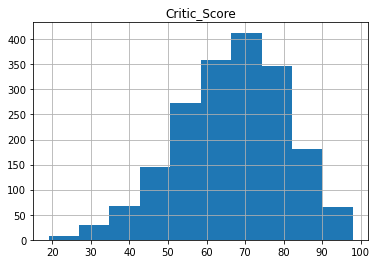

In [14]:
critic_action.hist()
#распределение близко к нормальному
print(critic_action.mean())

Critic_Score    72.086093
dtype: float64


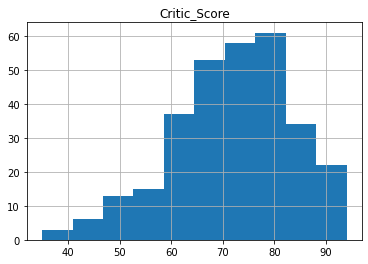

In [15]:
critic_strategy.hist()
print(critic_strategy.mean())
#распределение близко к нормальному

In [16]:
res = st.ttest_ind(critic_action, critic_strategy, equal_var = False, alternative = 'less')
print(res)

if res.pvalue < alpha:
    print('отвергаем нулевую гипотезу, оценка Action меньше оценки Strategy')
else:
    print('принимаем нулевую гипотезу, оценка Action больше или равна оценке Strategy')


Ttest_indResult(statistic=array([-7.22746372]), pvalue=array([1.05582909e-12]))
отвергаем нулевую гипотезу, оценка Action меньше оценки Strategy


# Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;  
7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи confusion_matrix;  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [127]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

df = pd.read_csv('D:/DS_Data_sets/spam.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [128]:
#1. нижний регистр
df['Message'] = df['Message'].apply(lambda x: x.lower())

print('общее количество слов: ',sum([len(x) for x in df['Message']]))
df.head()

общее количество слов:  447816


,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [129]:
#2. Удаление мусорных слов.

df['Message'] = df['Message'].apply(lambda x: re.sub('[\W_]+',' ', x))
print('общее количество слов: ',sum([len(x) for x in df['Message']]))
df.head()

общее количество слов:  430483


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [130]:
#преобразование в список
df['Message'] = df['Message'].apply(lambda x: x.split())
df.tail()

,Category,Message
5567,spam,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,"[will, ü, b, going, to, esplanade, fr, home]"
5569,ham,"[pity, was, in, mood, for, that, so, any, othe..."
5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."
5571,ham,"[rofl, its, true, to, its, name]"


In [131]:
#3. Удаление стоп-слов

nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))

def stop_w_remove(series):
    return [el for el in series if el not in stopwords_set]

df['Message'] = df['Message'].apply(stop_w_remove)
df['Message'].tail(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Михаил\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


5552    [safe, trip, nigeria, wish, happiness, soon, c...
5553                           [hahaha, use, brain, dear]
5554    [well, keep, mind, got, enough, gas, one, roun...
5555    [yeh, indians, nice, tho, kane, bit, shud, go,...
5556               [yes, u, texted, pshew, missing, much]
5557    [meant, calculation, lt, gt, units, lt, gt, sc...
5558                                 [sorry, call, later]
5559              [next, lt, gt, hours, imma, flip, shit]
5560                        [anything, lor, juz, us, lor]
5561    [get, dump, heap, mom, decided, come, lowes, b...
5562    [ok, lor, sony, ericsson, salesman, ask, shuhu...
5563                             [ard, 6, like, dat, lor]
5564              [wait, til, least, wednesday, see, get]
5565                                           [huh, lei]
5566    [reminder, o2, get, 2, 50, pounds, free, call,...
5567    [2nd, time, tried, 2, contact, u, u, 750, poun...
5568                   [ü, b, going, esplanade, fr, home]
5569          

In [132]:
#что то сработало точно
print(stopwords_set)

{'should', "didn't", 'about', 'each', 'off', 'wouldn', "doesn't", 'me', 'into', 'm', 'in', 'now', 'is', 'been', 'mightn', 'such', "won't", 're', 'myself', 'a', 'my', 'didn', 'until', 'once', 'be', 'them', 'with', 'than', 'the', 'being', 'at', 's', 'couldn', 'ain', 'then', 'very', 'him', 'for', 'they', 'other', "wouldn't", 'ours', "that'll", "mustn't", "shouldn't", "wasn't", 'your', 'had', "it's", 'it', 'again', 'can', "aren't", 'most', 'above', "should've", 'how', 'ourselves', 'as', 'any', 'all', 'who', 'y', 'few', "hadn't", 'this', 'aren', "needn't", 'both', 'whom', 'if', "you'd", "you'll", 'these', "hasn't", "mightn't", 'but', 'below', 'themselves', 'shouldn', 'himself', 'he', 'nor', 'before', 'her', 'hers', 'do', 'there', 'out', 'am', 'or', 'by', "haven't", 'here', 'while', 'theirs', 'his', 'after', "don't", 'doesn', 'mustn', "weren't", 'between', 'from', 'weren', 'through', 'not', 'haven', 'what', 'did', 'does', 'those', 'she', 'i', 'you', 'has', 'its', 'under', 'up', 'why', 'don',

In [133]:
print('общее количество слов: ',sum([len(x) for x in df['Message']]))
#7/8 слов - стоп-слова

общее количество слов:  53361


In [134]:
#общее количество символов для контроля выполнения лемматизации
print('общее количество символов:',len(''.join(sum([el for el in df['Message']],[]))))

общее количество символов: 247020


In [135]:
#4. Приведение слов к нормальной форме

nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(series):
    return [wordnet_lemmatizer.lemmatize(word) for word in series]

df['Lem_message'] = df['Message'].apply(lemmatize)
df['Lem_message'].tail(20)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Михаил\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


5552    [safe, trip, nigeria, wish, happiness, soon, c...
5553                           [hahaha, use, brain, dear]
5554    [well, keep, mind, got, enough, gas, one, roun...
5555    [yeh, indian, nice, tho, kane, bit, shud, go, ...
5556               [yes, u, texted, pshew, missing, much]
5557    [meant, calculation, lt, gt, unit, lt, gt, sch...
5558                                 [sorry, call, later]
5559               [next, lt, gt, hour, imma, flip, shit]
5560                         [anything, lor, juz, u, lor]
5561    [get, dump, heap, mom, decided, come, lowes, b...
5562    [ok, lor, sony, ericsson, salesman, ask, shuhu...
5563                             [ard, 6, like, dat, lor]
5564              [wait, til, least, wednesday, see, get]
5565                                           [huh, lei]
5566    [reminder, o2, get, 2, 50, pound, free, call, ...
5567    [2nd, time, tried, 2, contact, u, u, 750, poun...
5568                   [ü, b, going, esplanade, fr, home]
5569          

In [136]:
print('общее количество символов:',len(''.join(sum([el for el in df['Lem_message']],[]))))
#количество символов изменилось, лемматизация как то сработала

общее количество символов: 243821


In [137]:
#все равно есть сомнения в выполении лемматизации
#по строчке 4 видно что goes преобразовалось в go, так что считаем что все ок
df['is_Lemm'] = df['Message'] == df['Lem_message']
df

,Category,Message,Lem_message,is_Lemm
0,ham,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",True
1,ham,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",True
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",True
3,ham,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",True
4,ham,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]",False
...,...,...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tried, 2, contact, u, u, 750, poun...",True
5568,ham,"[ü, b, going, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]",True
5569,ham,"[pity, mood, suggestions]","[pity, mood, suggestion]",False
5570,ham,"[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin...",False


In [138]:
df.drop(columns = 'is_Lemm', inplace = True)
df

,Category,Message,Lem_message
0,ham,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]"
...,...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,"[ü, b, going, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestions]","[pity, mood, suggestion]"
5570,ham,"[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin..."


In [139]:
#5. Преобразование в вектор TF-IDF

#словарь текстов
from gensim import corpora
dict_ = corpora.Dictionary(df['Lem_message'])

print('количество слов в словаре: ',len(dict(dict_)), '\n')
print(dict(dict_))

количество слов в словаре:  8082 

{0: 'amore', 1: 'available', 2: 'buffet', 3: 'bugis', 4: 'cine', 5: 'crazy', 6: 'e', 7: 'go', 8: 'got', 9: 'great', 10: 'jurong', 11: 'la', 12: 'n', 13: 'point', 14: 'wat', 15: 'world', 16: 'joking', 17: 'lar', 18: 'ok', 19: 'oni', 20: 'u', 21: 'wif', 22: '08452810075over18', 23: '2', 24: '2005', 25: '21st', 26: '87121', 27: 'apply', 28: 'c', 29: 'comp', 30: 'cup', 31: 'entry', 32: 'fa', 33: 'final', 34: 'free', 35: 'may', 36: 'question', 37: 'rate', 38: 'receive', 39: 'std', 40: 'text', 41: 'tkts', 42: 'txt', 43: 'win', 44: 'wkly', 45: 'already', 46: 'dun', 47: 'early', 48: 'hor', 49: 'say', 50: 'around', 51: 'life', 52: 'nah', 53: 'think', 54: 'though', 55: 'usf', 56: '1', 57: '3', 58: '50', 59: 'back', 60: 'chgs', 61: 'darling', 62: 'freemsg', 63: 'fun', 64: 'hey', 65: 'like', 66: 'rcv', 67: 'send', 68: 'still', 69: 'tb', 70: 'week', 71: 'word', 72: 'xxx', 73: 'aid', 74: 'brother', 75: 'even', 76: 'patent', 77: 'speak', 78: 'treat', 79: '9', 80: 'c

In [140]:
bag_of_words = [dict_.doc2bow(el) for el in df['Lem_message']]
[print(x) for x in bag_of_words]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
[(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]
[(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)]
[(20, 2), (28, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2)]
[(7, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)]
[(18, 1), (39, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1)]
[(65, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)]
[(79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1)]
[(93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1)

[(18, 1)]
[(28, 1), (34, 1), (102, 1), (595, 1), (723, 1), (1104, 1), (1894, 1), (3528, 1)]
[(18, 1), (245, 2), (270, 2), (272, 1), (692, 1), (1020, 1)]
[(20, 2), (23, 1), (1414, 1), (3529, 1)]
[(233, 1)]
[(18, 1), (206, 1), (1329, 1), (1644, 1), (1940, 1), (3530, 1)]
[(23, 1), (138, 1), (229, 2), (233, 1), (239, 1), (299, 1), (1896, 1), (2737, 1)]
[(20, 1), (23, 1), (68, 1), (138, 1), (218, 1), (233, 1), (528, 1), (601, 1), (680, 1), (887, 1), (1072, 1), (1118, 1), (1466, 1)]
[(20, 1), (71, 1), (172, 1), (185, 1), (188, 1), (226, 1), (828, 1), (2343, 1)]
[(548, 1), (3531, 1), (3532, 1)]
[(20, 2), (256, 1), (265, 1), (534, 1), (548, 1), (833, 1), (840, 1), (1175, 1), (1507, 2), (1749, 1), (2054, 1), (2294, 1), (2683, 1), (3132, 1), (3533, 1), (3534, 1), (3535, 1), (3536, 1)]
[(198, 1), (306, 1), (411, 1)]
[(18, 1), (3537, 1)]
[(468, 1), (3538, 1), (3539, 1)]
[(35, 1), (65, 1), (145, 1), (203, 1), (394, 1), (442, 1), (466, 1), (568, 1), (573, 1), (582, 1), (681, 1), (833, 1), (1023, 1),

[(9, 1), (34, 1), (113, 1), (307, 1), (658, 1), (1377, 2), (3067, 1), (5016, 1), (5017, 1), (5018, 1), (5019, 1), (5020, 1)]
[(979, 1)]
[(191, 1), (321, 1), (821, 1), (840, 1), (934, 1), (987, 1), (1334, 1), (4945, 1)]
[(206, 1), (681, 1), (5021, 1)]
[(277, 1), (624, 1), (679, 1), (1343, 1)]
[(2290, 1), (2756, 3), (4512, 2), (5022, 1), (5023, 1), (5024, 2), (5025, 1), (5026, 1), (5027, 1), (5028, 1), (5029, 2), (5030, 1), (5031, 1), (5032, 1), (5033, 1), (5034, 2), (5035, 2), (5036, 1)]
[(203, 1), (225, 1), (1629, 1)]
[(132, 1), (225, 1), (395, 1)]
[(172, 1), (456, 1), (466, 1), (5037, 1)]
[(18, 1)]
[(20, 1), (5038, 1)]
[(63, 1), (75, 1), (206, 1), (245, 1), (357, 1), (410, 2), (625, 1), (979, 1), (1426, 1), (5039, 1), (5040, 1)]
[(18, 1), (233, 1)]
[(380, 1), (3423, 1), (5041, 1), (5042, 1)]
[(20, 1), (118, 1), (265, 1), (268, 1), (313, 1), (331, 1), (666, 1), (996, 4), (1022, 1), (1024, 1), (1433, 1), (2349, 1), (3060, 1), (3061, 1), (3062, 1)]
[(80, 1), (96, 1), (103, 1), (117, 1), 

[(953, 1), (6225, 1)]
[(245, 1), (270, 1), (656, 1), (1186, 1), (2108, 1)]
[(7, 1), (340, 1), (363, 1)]
[(67, 1), (302, 1), (2109, 1)]
[(5472, 1), (5473, 1), (5474, 1), (5475, 1)]
[(69, 1), (250, 1), (645, 1), (1826, 1), (1827, 1), (4910, 1), (6226, 1)]
[(8, 1), (65, 1), (138, 1), (813, 1), (2555, 1), (5601, 1), (6227, 1)]
[(9, 1), (51, 1), (63, 1), (338, 1), (351, 1), (405, 1), (442, 1), (534, 1), (548, 1), (554, 1), (665, 1), (1415, 1), (1580, 1), (1845, 1)]
[(34, 1), (70, 1), (88, 1), (96, 2), (102, 1), (132, 1), (149, 1), (299, 1), (422, 1), (722, 1), (1236, 1), (1239, 2), (1329, 1), (2702, 1), (4610, 1), (4737, 1), (6228, 1), (6229, 1), (6230, 1)]
[(96, 1), (99, 1), (103, 1), (108, 1), (479, 1), (480, 1), (481, 1), (482, 1), (483, 1), (484, 1), (485, 1), (486, 1), (487, 1), (6231, 1)]
[(6, 1), (149, 1), (302, 1), (820, 1), (859, 1), (1113, 1), (1812, 1), (4695, 1), (6232, 1)]
[(34, 1), (42, 2), (56, 1), (62, 1), (96, 3), (118, 1), (166, 1), (544, 2), (631, 1), (1238, 2), (1891, 1)

[(598, 1)]
[(57, 1), (96, 1), (117, 1), (150, 1), (161, 1), (178, 1), (363, 1), (917, 1), (1217, 1), (1377, 1), (1666, 1), (3583, 1), (4610, 1), (4809, 1), (7380, 1), (7381, 1), (7382, 1)]
[(410, 1), (1779, 1), (5256, 1), (7383, 1)]
[(8, 1), (20, 1), (840, 1), (1024, 1)]
[(466, 1), (600, 1), (3363, 1)]
[(96, 1), (102, 1), (149, 2), (345, 1), (347, 1), (353, 1), (386, 1), (641, 1), (692, 1), (722, 1), (976, 1), (1235, 1), (1236, 1), (1239, 1), (1329, 1), (1459, 1), (1622, 1)]
[(206, 1), (218, 2), (368, 1), (442, 1), (534, 1), (585, 1), (904, 1), (1055, 1), (1339, 1), (1647, 1), (1749, 1), (2036, 1), (2399, 3), (3690, 1), (4333, 2), (4334, 1), (4892, 1), (7384, 1)]
[(222, 1), (446, 1), (640, 1), (1189, 1)]
[(6, 1), (65, 1), (302, 1), (351, 1), (405, 2), (612, 2), (1083, 1), (1301, 1), (1834, 1), (1970, 1), (2302, 1), (3277, 1), (3750, 1), (4957, 1), (6048, 1), (6652, 1), (6653, 1), (6654, 1)]
[(20, 1), (702, 1), (1012, 1), (1681, 1), (2417, 1), (2547, 1), (2891, 1), (4362, 1), (5514, 1),

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [141]:
#TF-IDF
from gensim.models import TfidfModel
tfidf = TfidfModel(bag_of_words)

#на всякий случай
len(tfidf[bag_of_words])

5572

In [142]:
df['TF-IDF'] = tfidf[bag_of_words]
df

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Category,Message,Lem_message,TF-IDF
0,ham,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...","[(0, 0.36848727370533346), (1, 0.2450087441821..."
1,ham,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[(16, 0.5313836131256299), (17, 0.389928188869..."
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(22, 0.24592837814575857), (23, 0.07978418476..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]","[(20, 0.25026967474435463), (28, 0.24421107404..."
4,ham,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]","[(7, 0.2271196201502826), (50, 0.3521302378030..."
...,...,...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tried, 2, contact, u, u, 750, poun...","[(20, 0.15594420758102956), (23, 0.21824648175..."
5568,ham,"[ü, b, going, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[(125, 0.29282664067160014), (199, 0.351002049..."
5569,ham,"[pity, mood, suggestions]","[pity, mood, suggestion]","[(4831, 0.48768107634645996), (7937, 0.5909597..."
5570,ham,"[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin...","[(20, 0.09297572135704067), (34, 0.16138783915..."


In [143]:
#тест пригодности текущего вида данных TF-IDF к использованию в логистической регрессии
#возможно в каждой строке должны быть представлены все индексы, точнее "веса", при этом сами индексы нужно удалить.
#Также, возможно, необходимо равное количество всех элементов в X
#Таким образом каждый элемент массива будет прелствалять координату точки в многомерном пространстве размерностью равной размеру массива
#для этого использую в качестве теста рандомный массив с одинаковым количеством элементов

df['Test'] = [np.random.uniform(size = 3) for _ in df['Message']]
df.head()

,Category,Message,Lem_message,TF-IDF,Test
0,ham,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...","[(0, 0.36848727370533346), (1, 0.2450087441821...","[0.30436829857714387, 0.3955145802103487, 0.57..."
1,ham,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[(16, 0.5313836131256299), (17, 0.389928188869...","[0.16404792742460905, 0.9488278436255778, 0.81..."
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(22, 0.24592837814575857), (23, 0.07978418476...","[0.18497185192334809, 0.2054414672441105, 0.72..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]","[(20, 0.25026967474435463), (28, 0.24421107404...","[0.27326522626007543, 0.5236759631602973, 0.16..."
4,ham,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]","[(7, 0.2271196201502826), (50, 0.3521302378030...","[0.48701543808143677, 0.08635089201946722, 0.9..."


In [144]:
#возможно надо заменить в категориях текст на числа
#спойлер: нет

df['ham'] = df['Category'] != 'spam'
df

,Category,Message,Lem_message,TF-IDF,Test,ham
0,ham,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...","[(0, 0.36848727370533346), (1, 0.2450087441821...","[0.30436829857714387, 0.3955145802103487, 0.57...",True
1,ham,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[(16, 0.5313836131256299), (17, 0.389928188869...","[0.16404792742460905, 0.9488278436255778, 0.81...",True
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(22, 0.24592837814575857), (23, 0.07978418476...","[0.18497185192334809, 0.2054414672441105, 0.72...",False
3,ham,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]","[(20, 0.25026967474435463), (28, 0.24421107404...","[0.27326522626007543, 0.5236759631602973, 0.16...",True
4,ham,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]","[(7, 0.2271196201502826), (50, 0.3521302378030...","[0.48701543808143677, 0.08635089201946722, 0.9...",True
...,...,...,...,...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tried, 2, contact, u, u, 750, poun...","[(20, 0.15594420758102956), (23, 0.21824648175...","[0.28588166372436286, 0.27672755599796184, 0.9...",False
5568,ham,"[ü, b, going, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[(125, 0.29282664067160014), (199, 0.351002049...","[0.4669894013274428, 0.2815444624106965, 0.644...",True
5569,ham,"[pity, mood, suggestions]","[pity, mood, suggestion]","[(4831, 0.48768107634645996), (7937, 0.5909597...","[0.9284178928220825, 0.13139453167739845, 0.51...",True
5570,ham,"[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin...","[(20, 0.09297572135704067), (34, 0.16138783915...","[0.35507624665526505, 0.2411873593964763, 0.73...",True


In [156]:
#6. Разделение на выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['TF-IDF']], df['ham'], test_size=0.3, random_state=42)
print(X_train)

                                                 TF-IDF
708   [(17, 0.2981808854797448), (94, 0.365136497043...
4338  [(20, 0.17626354178359552), (119, 0.3427561072...
5029  [(7, 0.20164440924111904), (387, 0.36618567415...
4921  [(40, 0.22543695917404727), (49, 0.26273022442...
2592  [(68, 0.3513018729130705), (222, 0.34398877785...
...                                                 ...
3772  [(8, 0.17944486520353764), (59, 0.204366954735...
5191  [(96, 0.4034421882949355), (410, 0.63506375486...
5226  [(834, 0.2931119399395079), (1947, 0.368640579...
5390  [(16, 0.5758294075968381), (221, 0.54166387072...
860   [(49, 0.3092651737694074), (1344, 0.4951993299...

[3900 rows x 1 columns]


In [157]:
#7. Логистическая регрессия
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [ ]:
#8. Confusion matrix

In [ ]:
#9. DataFrame с неправильно классифицированными словами